# Clustering With K Means

In [64]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [65]:
# Load data
data = pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [66]:
# Check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [67]:
# Taking only numerical features
df = data.select_dtypes(exclude='object')
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


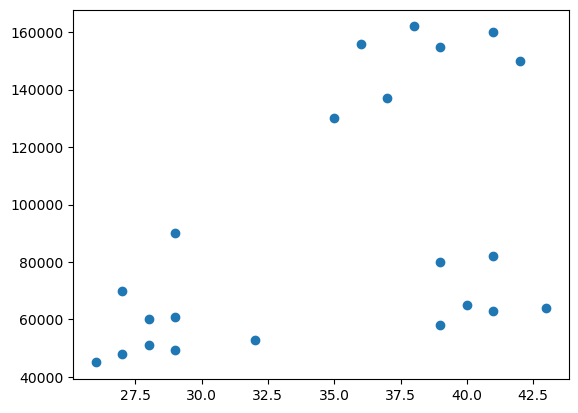

In [68]:
# Plot the data.
plt.scatter(df['Age'], df['Income($)'])

In [69]:
# Clustering
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)
y_pred

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [70]:
# Add predictions to the data frame
df['cluster'] = y_pred
df.head()

,Age,Income($),cluster
0,27,70000,2
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [71]:
# Find the centroid positions
centroids = km.cluster_centers_
centroids

array([[3.63333333e+01, 8.40000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04]])

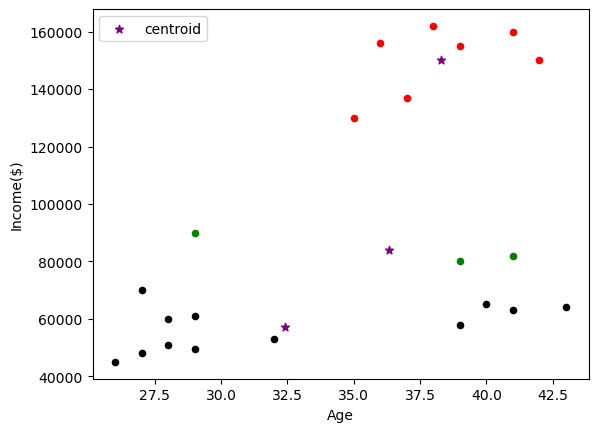

In [72]:
# Plot the clusters alongs with centroids
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

fig = plt.figure()
df1.plot.scatter('Age', 'Income($)', ax=fig.gca(), c='green')
df2.plot.scatter('Age', 'Income($)', ax=fig.gca(), c='red')
df3.plot.scatter('Age', 'Income($)', ax=fig.gca(), c='black')
fig.gca().scatter(centroids[:,0], centroids[:,1], marker='*', c='purple', label='centroid')
plt.legend()


## Preprocessing using min max scaler
From the above figure, it is evident that the clustering was not good enough. It is because of the difference in scaling of the features "Age" and "Income($)". To nullify this problem we can normalize both features using min max scaler

In [73]:
# Normalizing features
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


In [74]:
# Clustering
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df.drop('cluster', axis=1))
centroids = km.cluster_centers_
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


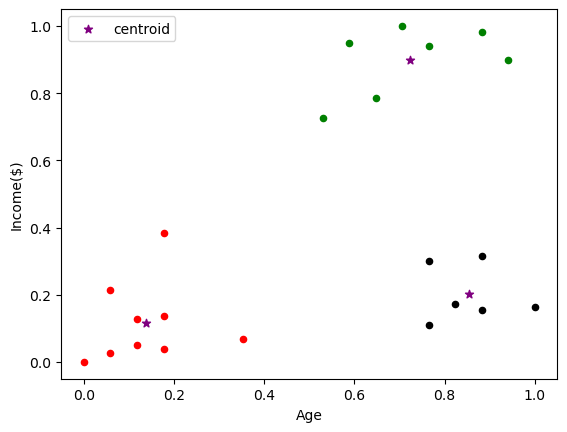

In [75]:
# Plot the clusters and centroids
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

fig1 = plt.figure()
df1.plot.scatter('Age', 'Income($)', ax=fig1.gca(), c='green')
df2.plot.scatter('Age', 'Income($)', ax=fig1.gca(), c='red')
df3.plot.scatter('Age', 'Income($)', ax=fig1.gca(), c='black')
fig1.gca().scatter(centroids[:,0], centroids[:,1], marker='*', c='purple', label='centroid')
plt.legend()


## Elbow Plot
The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.The elbow graph shows the cluster-sum-of-square-error (CSSE) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow (**here it is 3**).

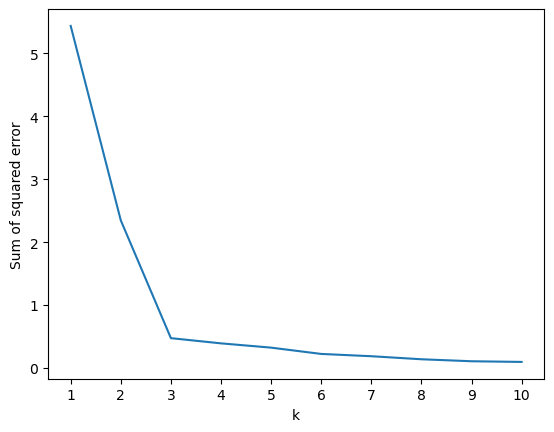

In [76]:
# Plot the sum of squared error between centroid and the data points in clusters for number of clusters in range 1 to 10
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df.drop('cluster', axis=1))
    sse.append(km.inertia_)

plt.plot(k_rng, sse)
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.xticks(k_rng)
plt.show()
    